In [1]:
from keras.models import Sequential
import numpy as np
from keras.utils import np_utils
import cv2

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from scipy.misc import imresize #, imread, imshow
from cv2 import  imread

In [4]:
I = []
C = []

In [5]:
with open('good.dat', 'r') as file:
    L = (file.readlines())


In [6]:
for line in L:
    filename,c,x,y,x2,y2 = line.strip().split(' ')
    C.append((int(c),int(x)/480,int(y)/640,int(x2)/480,int(y2)/640))
    image = imresize(imread(filename), (48, 64))
    I.append(image)

In [7]:
with open('bad.dat', 'r') as file:
    L = (file.readlines())

In [8]:
for line in L:
    filename = line.strip()
    C.append((0,0,0,0,0))
    image = imresize(imread(filename), (48, 64))
    I.append(image)

In [9]:
from sklearn.utils import shuffle

In [10]:
plt.imshow(I[300])
print(C[300])

(1, 0.3729166666666667, 0.3265625, 0.6645833333333333, 0.4953125)


In [23]:
S = []
for pic in I:
    h,s,v = cv2.split(cv2.cvtColor(pic, cv2.COLOR_BGR2HSV))
    S.append([s])

In [31]:
X = np.array(S, dtype=np.float32)/255
X = np.rollaxis(X,1, 4)
Y = np.array(C, dtype=np.float32)
print(X.shape)
print(Y.shape)

(4448, 48, 64, 1)
(4448, 5)


In [11]:
def save_batch(array, num):
    np.save('np{}.batch.cv'.format(num), array)
def load_batch(num):
    return np.load('np{}.batch.cv.npy'.format(num))

In [14]:
save_batch(X, 1)
save_batch(Y, 2)

In [ ]:
i = 1
x0 = 0
for x in range (500, len(I), 500):
    save_batch(np.array(I[x0:x], dtype=np.float32)/255, i)
    print(x0, x)
    x0 = x
    i += 1
save_batch(np.array(I[x0:x], dtype=np.float32)/255, i)
print(x0, len(I))

In [ ]:
X=load_batch(1)

In [32]:
X, Y = shuffle(X, Y)

In [33]:
X.shape

(4448, 48, 64, 1)

In [34]:
X_train = X[:-500]
Y_train = Y[:-500]

X_test = X[-500:]
Y_test = Y[-500:]
print(X_train.shape, X_test.shape)

(3948, 48, 64, 1) (500, 48, 64, 1)


In [17]:
plt.imshow(B[1])
print(C[1])

NameError: name 'B' is not defined

In [18]:
plt.imshow(X[3])
print(Y[3])

[ 0.  0.  0.  0.  0.]


In [35]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.layers.advanced_activations import ELU

In [36]:
model = Sequential()

model.add(Convolution2D(32, 4, 4, input_shape=(48, 64, 1), activation='elu', border_mode='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.7))


model.add(Convolution2D(48, 2, 2, activation='elu', border_mode='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.7))

model.add(Convolution2D(64, 4, 4, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.7))

model.add(Convolution2D(128, 2, 2, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
#model.add(Dense(5, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))

In [48]:
sgd = SGD(lr=0.05, momentum=0.9, nesterov=False)

model.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=100, verbose=2)

Epoch 1/100
10s - loss: 0.0016 - acc: 0.9716
Epoch 2/100
7s - loss: 0.0019 - acc: 0.9706
Epoch 3/100
7s - loss: 0.0016 - acc: 0.9742
Epoch 4/100
7s - loss: 0.0016 - acc: 0.9688
Epoch 5/100
7s - loss: 0.0016 - acc: 0.9711
Epoch 6/100
7s - loss: 0.0015 - acc: 0.9775
Epoch 7/100
7s - loss: 0.0016 - acc: 0.9749
Epoch 8/100
7s - loss: 0.0017 - acc: 0.9709
Epoch 9/100
7s - loss: 0.0015 - acc: 0.9739
Epoch 10/100
7s - loss: 0.0015 - acc: 0.9688
Epoch 11/100
7s - loss: 0.0015 - acc: 0.9749
Epoch 12/100
8s - loss: 0.0015 - acc: 0.9767
Epoch 13/100
7s - loss: 0.0015 - acc: 0.9759
Epoch 14/100
7s - loss: 0.0014 - acc: 0.9739
Epoch 15/100
7s - loss: 0.0014 - acc: 0.9757
Epoch 16/100
7s - loss: 0.0015 - acc: 0.9732
Epoch 17/100
8s - loss: 0.0016 - acc: 0.9696
Epoch 18/100
8s - loss: 0.0015 - acc: 0.9757
Epoch 19/100
8s - loss: 0.0015 - acc: 0.9729
Epoch 20/100
8s - loss: 0.0015 - acc: 0.9706
Epoch 21/100
7s - loss: 0.0015 - acc: 0.9709
Epoch 22/100
7s - loss: 0.0014 - acc: 0.9749
Epoch 23/100
7s - 

In [50]:
def printPred(num):
    print('pr',Y_pred[num])
    print('te',Y_test[num])

In [51]:
model.evaluate(X_test, Y_test)

480/500 [===========================>..] - ETA: 0s

[0.00036862202081829309, 0.98999999999999999]

In [52]:
Y_pred = model.predict(X_test, batch_size=1)

In [53]:
for x in range(10, 20):
    printPred(x)

pr [ 1.00355613  0.70655131  0.23978902  0.7899937   0.31252849]
te [ 1.          0.64166665  0.246875    0.75        0.3125    ]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]
pr [ 1.00396383  0.23956589  0.30535355  0.51949519  0.53597838]
te [ 1.          0.24166666  0.23125     0.50416666  0.5625    ]
pr [ 1.0010674   0.61598092  0.43338466  0.83926052  0.62374878]
te [ 1.          0.58958334  0.43281251  0.83958334  0.62187499]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]
pr [ 0.  0.  0.  0.  0.]
te [ 0.  0.  0.  0.  0.]


In [54]:
model.save('my_model_cv_hsv2.h5')

In [255]:
from keras.models import load_model

In [256]:
model = load_model('my_model.h5')

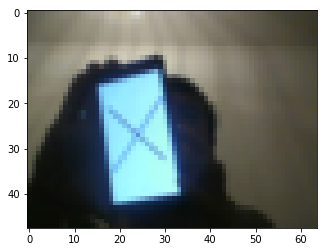

In [192]:
plt.imshow(X_test[10])

In [345]:

import matplotlib.patches as patches

In [346]:
t

def drawRect(pr, ax, color):
    c,x,y,x2,y2 = calc_coord(pr)
    rect = patches.Rectangle((x,y),x2,y2,linewidth=1,edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    if c > 0:
        ax.add_patch(rect)
    
    
def drawim(num, X, Y, Y2):
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(X[num])

    drawRect(Y[num], ax, 'r')
    drawRect(Y2[num], ax, 'g')
    plt.show()
    print(Y[num])
    
def draw(num, X, Y, Y2, ax):
    # Display the image
    ax.imshow(X[num])

    drawRect(Y[num], ax, 'r')
    drawRect(Y2[num], ax, 'g')
    

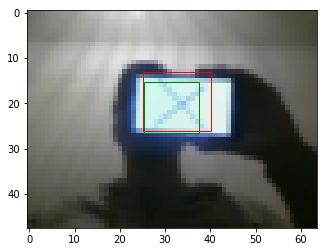

[ 1.          0.52291667  0.20468751  0.83749998  0.40937501]


In [347]:
drawim(12, X_test, Y_test, Y_pred)

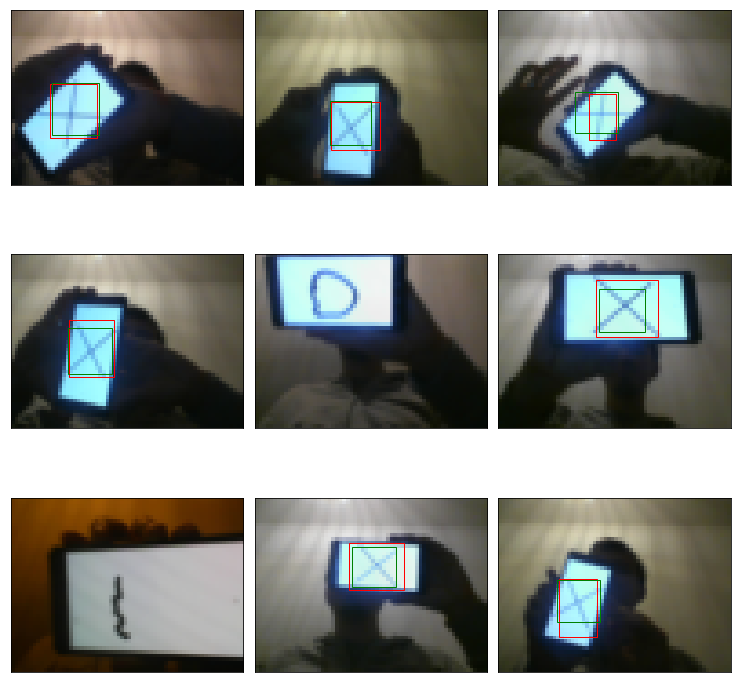

In [348]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    draw(i+106, X_test, Y_test, Y_pred, ax)

plt.show()

In [328]:
print(X_test.shape)
print(X_train.shape)

(500, 48, 64, 3)
(3948, 48, 64, 3)


In [350]:
import cv2

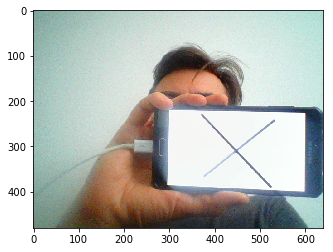

In [364]:
cap = cv2.VideoCapture(0)
_, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
cap.release()

In [365]:
pic = imresize(frame, (48, 64))
X_pic = np.array([pic], dtype=np.float32)/255

In [366]:
Y_pic = model.predict(X_pic, batch_size=1)

In [367]:
Y_pic

array([[ 0.,  0.,  0.,  0.,  0.]], dtype=float32)